In [11]:
import pandas as pd

# Carregar o arquivo CSV para um DataFrame
df = pd.read_csv('fraudTrain.csv')

# Obter o número de linhas e colunas
num_linhas, num_colunas = df.shape

print(f'A base de dados possui {num_linhas} linhas e {num_colunas} colunas.')


A base de dados possui 1296675 linhas e 23 colunas.


In [4]:
# Contar o número de exemplos da classe positiva (fraude)
num_fraudes = df[df['is_fraud'] == 1].shape[0]

# Calcular a proporção
total_exemplos = df.shape[0]
proporcao_fraudes = num_fraudes / total_exemplos

print(f'A proporção aproximada de elementos da classe positiva (fraude) é: {proporcao_fraudes:.2%}')

A proporção aproximada de elementos da classe positiva (fraude) é: 0.58%


In [5]:
# Contar o número de instâncias para cada classe
contagem_classes = df['is_fraud'].value_counts()

print("Contagem de classes:")
print(contagem_classes)

# Verificar se as classes estão balanceadas
if len(contagem_classes) == 2:
    classe_positiva = contagem_classes[1]
    classe_negativa = contagem_classes[0]
    proporcao = classe_positiva / classe_negativa
    print(f"Proporção entre classe positiva e classe negativa: {proporcao:.2f}")
    if proporcao >= 0.8 and proporcao <= 1.2:
        print("O conjunto de dados possui classes balanceadas.")
    else:
        print("O conjunto de dados não possui classes balanceadas.")
else:
    print("O conjunto de dados não possui exatamente duas classes.")

Contagem de classes:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64
Proporção entre classe positiva e classe negativa: 0.01
O conjunto de dados não possui classes balanceadas.


In [10]:
# Verificar quais colunas possuem dados faltantes (NaN)
colunas_com_nan = df.columns[df.isna().any()]

# Contar quantas colunas têm pelo menos um NaN
num_colunas_com_nan = len(colunas_com_nan)

print(f"O número de colunas com pelo menos um dado faltante (NaN) é: {num_colunas_com_nan}")

O número de colunas com pelo menos um dado faltante (NaN) é: 0


In [12]:
# Calcular o número de NaNs em cada coluna especificada
nan_counts = df[['cc_num', 'job', 'zip', 'trans_num']].isna().sum()

# Encontrar a coluna com o maior número de NaNs
coluna_com_mais_nans = nan_counts.idxmax()
quantidade_nans = nan_counts.max()

print(f"A coluna com a maior quantidade de dados faltantes é '{coluna_com_mais_nans}' com {quantidade_nans} NaNs.")

A coluna com a maior quantidade de dados faltantes é 'cc_num' com 0 NaNs.


In [13]:
# Contar quantos valores distintos existem na coluna "street"
num_valores_distintos = df['street'].nunique()

print(f"O número de valores distintos na coluna 'street' é: {num_valores_distintos}")

O número de valores distintos na coluna 'street' é: 983


In [14]:
# Contar quantos valores distintos existem na coluna "job"
num_valores_distintos = df['job'].nunique()

print(f"O número de valores distintos na coluna 'job' é: {num_valores_distintos}")

O número de valores distintos na coluna 'job' é: 494


In [15]:
# Tratamento na coluna "job"
df['job'] = df['job'].str.replace(',', ' ').str.replace('/', ' ')

# Pegar apenas a primeira palavra do nome da profissão
df['job'] = df['job'].str.split().str[0]

# Contar quantas profissões únicas temos após o tratamento
profissoes_unicas = df['job'].nunique()

print(f"O número de profissões únicas após o tratamento é: {profissoes_unicas}")

O número de profissões únicas após o tratamento é: 318


In [18]:
# Contar quantos valores distintos existem na coluna "zip"
num_valores_distintos = df['zip'].nunique()

print(f"O número de valores distintos na coluna 'zip' é: {num_valores_distintos}")

O número de valores distintos na coluna 'zip' é: 970


In [19]:
# Contar quantos valores distintos existem na coluna "city"
num_valores_distintos = df['city'].nunique()

print(f"O número de valores distintos na coluna 'city' é: {num_valores_distintos}")

O número de valores distintos na coluna 'city' é: 894


In [20]:
# Contar quantos valores distintos existem na coluna "state"
num_valores_distintos = df['state'].nunique()

print(f"O número de valores distintos na coluna 'state' é: {num_valores_distintos}")

O número de valores distintos na coluna 'state' é: 51


In [21]:
# Contar quantos valores distintos existem na coluna "category"
num_valores_distintos = df['category'].nunique()

print(f"O número de valores distintos na coluna 'category' é: {num_valores_distintos}")

O número de valores distintos na coluna 'category' é: 14


In [22]:
# Converter a coluna "trans_date_trans_time" para datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Encontrar a data da transação mais recente
data_mais_recente = df['trans_date_trans_time'].max()

print(f"A data da transação mais recente é: {data_mais_recente}")

A data da transação mais recente é: 2020-06-21 12:13:37


In [23]:
# Encontrar a data da transação mais antiga
data_mais_antiga = df['trans_date_trans_time'].min()

print(f"A data da transação mais antiga é: {data_mais_antiga}")

A data da transação mais antiga é: 2019-01-01 00:00:18


In [24]:
# Converter a coluna "dob" para datetime, considerando o formato de data se necessário
df['dob'] = pd.to_datetime(df['dob'])

# Encontrar o ano de nascimento do cliente mais velho
ano_nascimento_cliente_mais_velho = df['dob'].min().year

print(f"O ano de nascimento do cliente mais velho é: {ano_nascimento_cliente_mais_velho}")

O ano de nascimento do cliente mais velho é: 1924


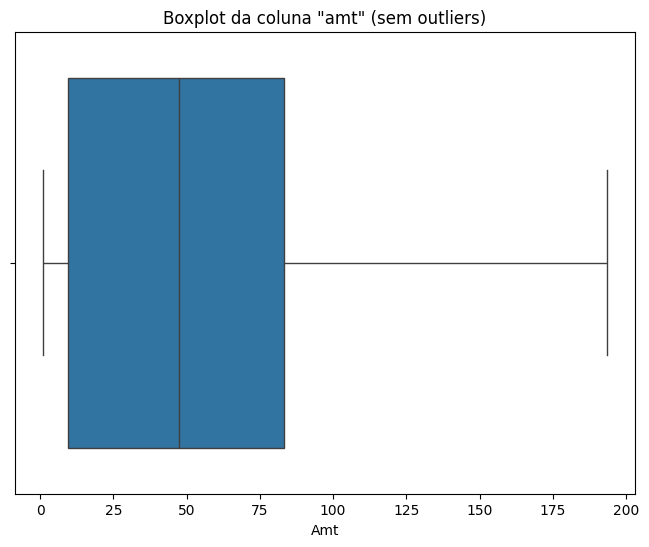

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir o tamanho do gráfico
plt.figure(figsize=(8, 6))

# Criar o boxplot da coluna "amt" com seaborn
sns.boxplot(x=df['amt'], showfliers=False)

# Adicionar título e rótulo ao eixo x
plt.title('Boxplot da coluna "amt" (sem outliers)')
plt.xlabel('Amt')

# Mostrar o gráfico
plt.show()


In [28]:
import numpy as np

# Calcular quartis Q1 e Q3, e intervalo interquartil (IQR)
Q1 = np.nanpercentile(df['amt'], 25)
Q3 = np.nanpercentile(df['amt'], 75)
IQR = Q3 - Q1

# Calcular o limite inferior para outliers
limite_inferior = Q1 - 1.5 * IQR

# Encontrar observações que são outliers inferiores
outliers_inferiores = df[df['amt'] < limite_inferior]

# Contar quantos outliers inferiores existem
num_outliers_inferiores = outliers_inferiores.shape[0]

print(f"O limite inferior para outliers é: {limite_inferior}")
print(f"Quantidade de outliers inferiores encontrados: {num_outliers_inferiores}")


O limite inferior para outliers é: -100.58499999999998
Quantidade de outliers inferiores encontrados: 0


In [29]:
# Calcular quartis Q1 e Q3, e intervalo interquartil (IQR)
Q1 = np.nanpercentile(df['amt'], 25)
Q3 = np.nanpercentile(df['amt'], 75)
IQR = Q3 - Q1

# Calcular o limite superior para outliers
limite_superior = Q3 + 1.5 * IQR

# Encontrar observações que são outliers superiores
outliers_superiores = df[df['amt'] > limite_superior]

# Contar quantos outliers superiores existem
num_outliers_superiores = outliers_superiores.shape[0]

print(f"O limite superior para outliers é: {limite_superior}")
print(f"Quantidade de outliers superiores encontrados: {num_outliers_superiores}")

O limite superior para outliers é: 193.375
Quantidade de outliers superiores encontrados: 67290


In [30]:
# Calcular quartis Q1 e Q3, e intervalo interquartil (IQR)
Q1 = np.nanpercentile(df['amt'], 25)
Q3 = np.nanpercentile(df['amt'], 75)
IQR = Q3 - Q1

# Calcular limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Encontrar outliers (superiores e inferiores)
outliers = df[(df['amt'] < limite_inferior) | (df['amt'] > limite_superior)]

# Calcular percentagem de transações fraudulentas entre os outliers
outliers_fraudulentos = outliers[outliers['is_fraud'] == 1]
percentual_fraudulentos = (outliers_fraudulentos.shape[0] / outliers.shape[0]) * 100

print(f"A percentagem aproximada de transações fraudulentas entre os outliers da coluna 'amt' é: {percentual_fraudulentos:.2f}%")

A percentagem aproximada de transações fraudulentas entre os outliers da coluna 'amt' é: 8.48%


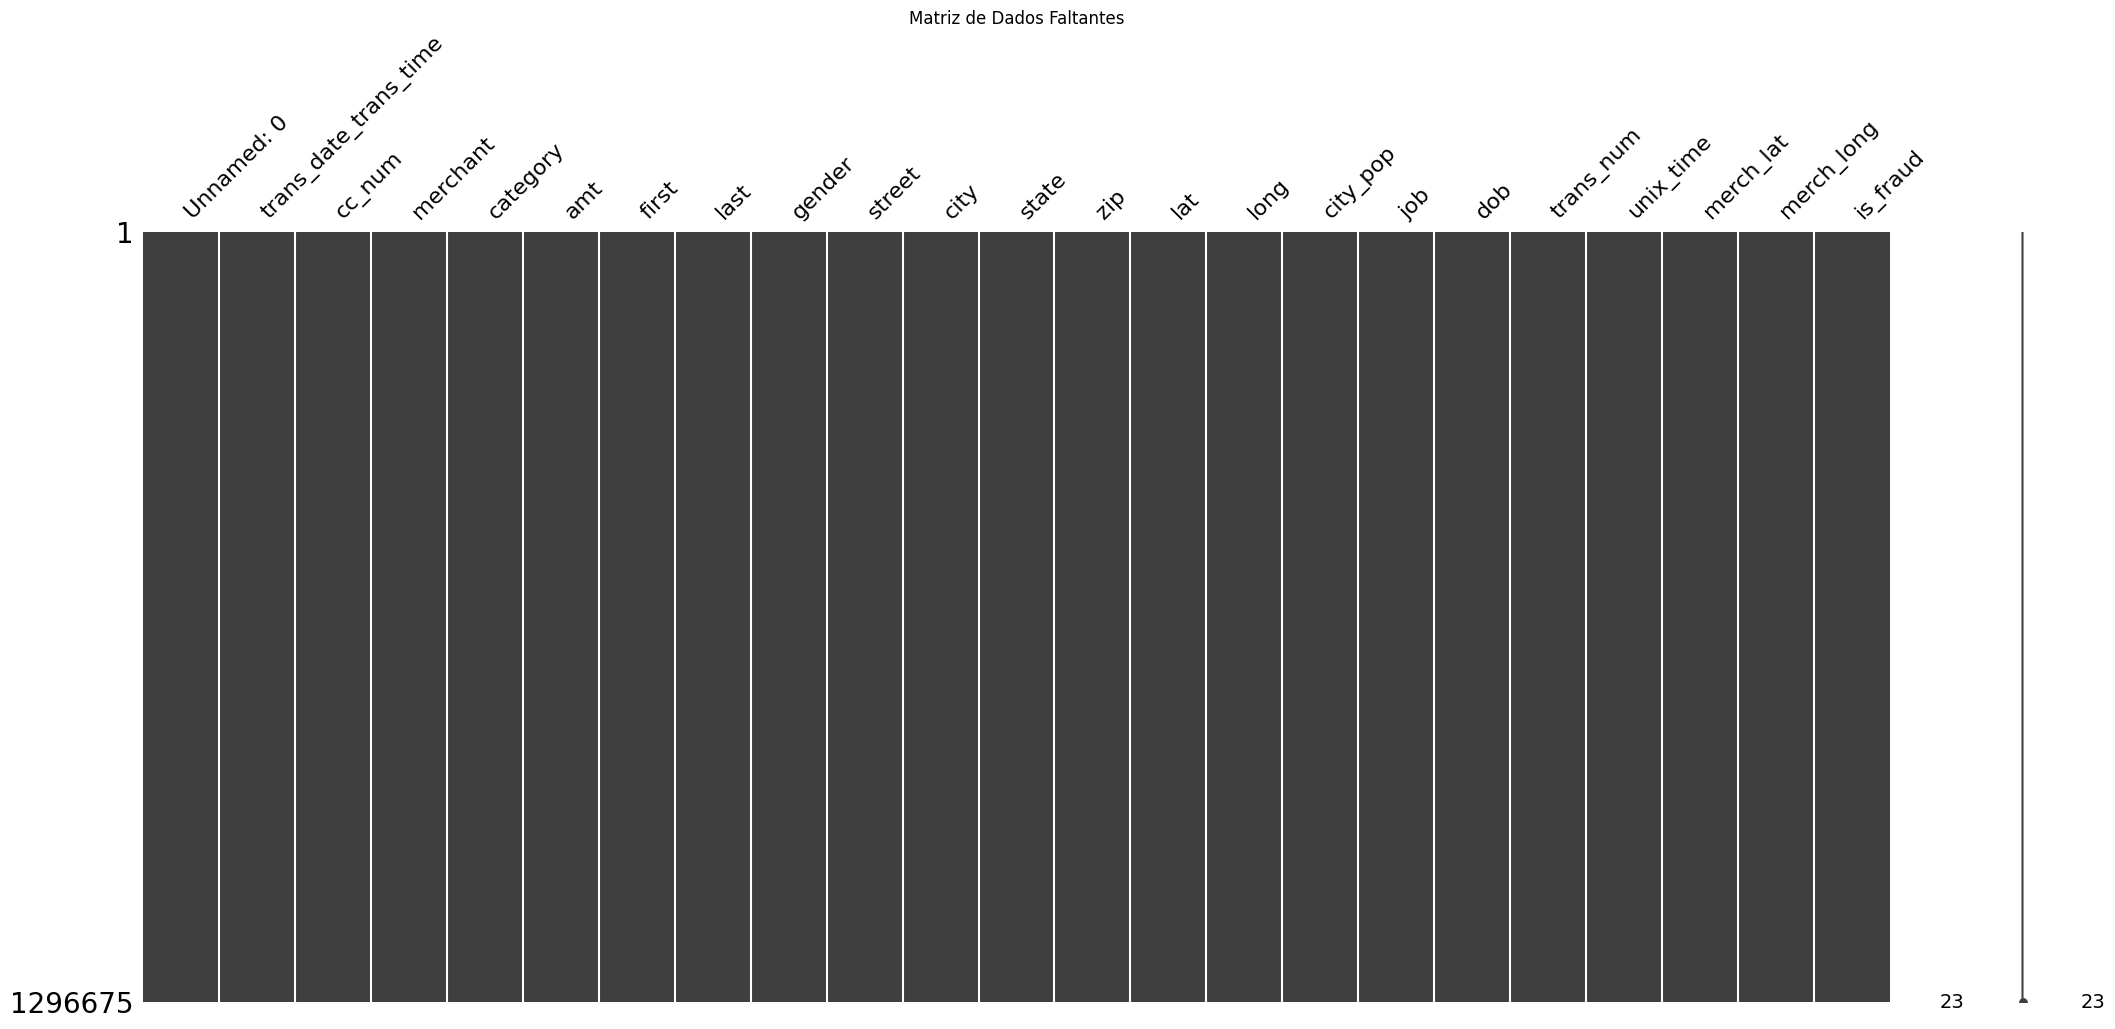

In [32]:
import missingno as msno

# Criar a matriz de dados faltantes
msno.matrix(df)

# Adicionar título ao gráfico
plt.title('Matriz de Dados Faltantes')

# Mostrar o gráfico
plt.show()


c:\Users\mari_\OneDrive\Documentos\Cientista de Dados\avaliação de modelos\myenv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\mari_\OneDrive\Documentos\Cientista de Dados\avaliação de modelos\myenv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


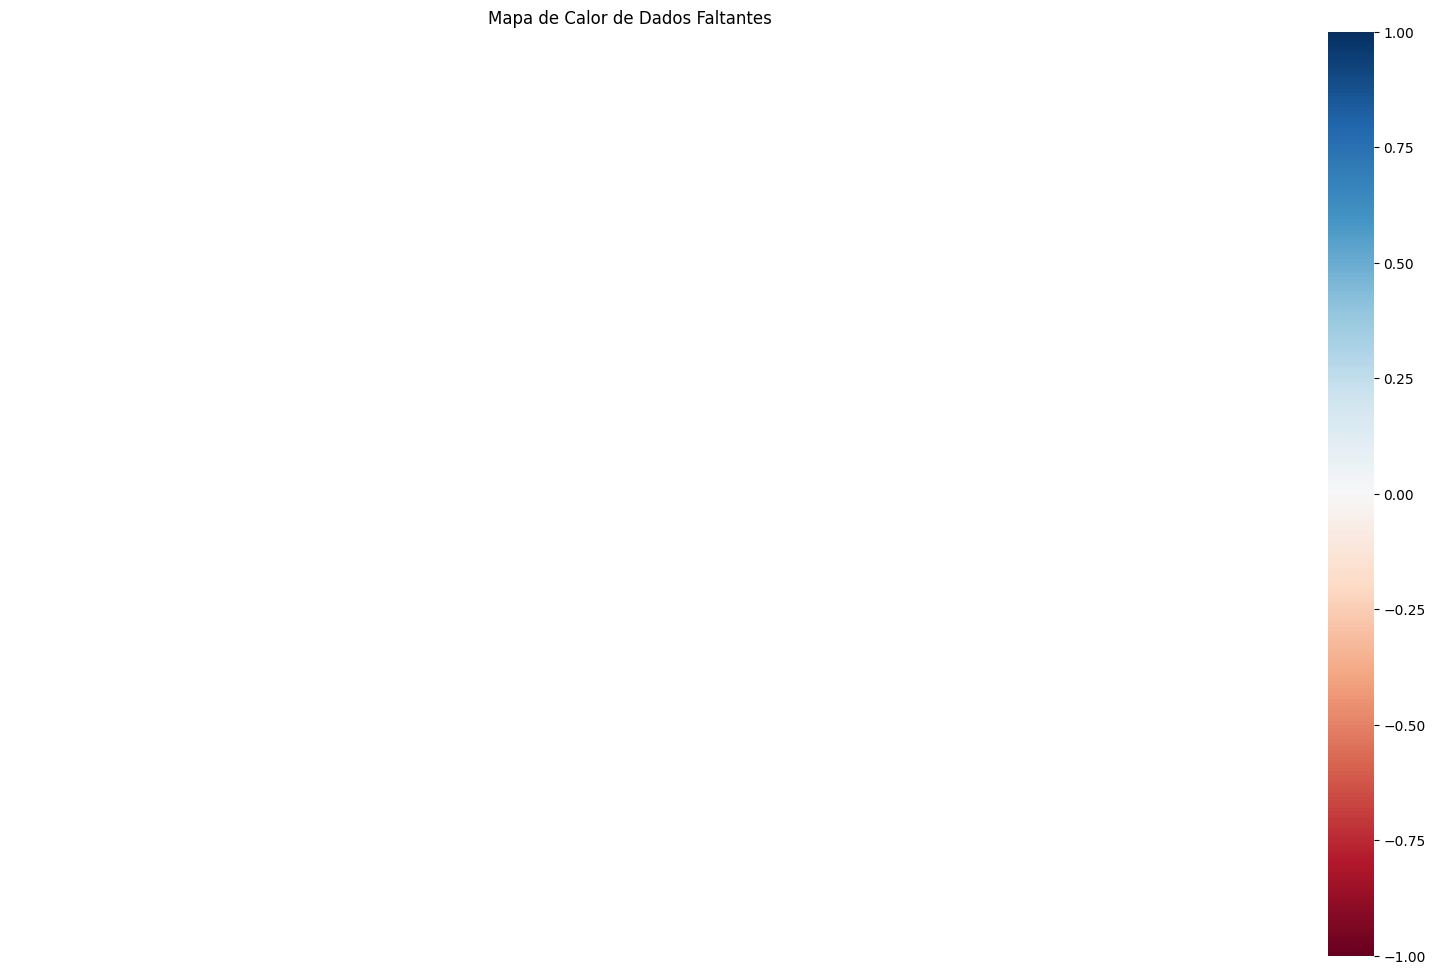

In [33]:
# Criar o heatmap de dados faltantes
msno.heatmap(df)

# Adicionar título ao gráfico
plt.title('Mapa de Calor de Dados Faltantes')

# Mostrar o gráfico
plt.show()

In [38]:
from datetime import datetime

# Converter a coluna "dob" para datetime, considerando o formato de data se necessário
df['dob'] = pd.to_datetime(df['dob'])

# Calcular a idade dos clientes com base na data de nascimento
hoje = datetime.now()
df['idade'] = hoje.year - df['dob'].dt.year - ((hoje.month < df['dob'].dt.month) | ((hoje.month == df['dob'].dt.month) & (hoje.day < df['dob'].dt.day)))

# Remover a coluna "dob" agora que temos a idade calculada
df.drop(columns=['dob'], inplace=True)

# Encontrar a idade do cliente mais novo na data da transação
idade_cliente_mais_novo = df['idade'].min()

print(f"A idade do cliente mais novo na data da transação é: {idade_cliente_mais_novo} anos")

A idade do cliente mais novo na data da transação é: 19 anos


In [39]:
# Converter a coluna "trans_date_trans_time" para datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Definir a nova coluna "dia_da_semana"
df['dia_da_semana'] = df['trans_date_trans_time'].dt.weekday

# Exibir as primeiras linhas do DataFrame para verificar
print(df[['trans_date_trans_time', 'dia_da_semana']].head())

  trans_date_trans_time  dia_da_semana
0   2019-01-01 00:00:18              1
1   2019-01-01 00:00:44              1
2   2019-01-01 00:00:51              1
3   2019-01-01 00:01:16              1
4   2019-01-01 00:03:06              1


In [40]:
# Converter a coluna "trans_date_trans_time" para datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Definir a função para classificar o período da transação
def definir_periodo(hour):
    if hour < 6:
        return 'madrugada'
    elif hour < 12:
        return 'manha'
    elif hour < 18:
        return 'tarde'
    else:
        return 'noite'

# Aplicar a função para criar a coluna "periodo_transacao"
df['periodo_transacao'] = df['trans_date_trans_time'].dt.hour.apply(definir_periodo)

# Remover a coluna "trans_date_trans_time"
df.drop(columns=['trans_date_trans_time'], inplace=True)

# Contar o número de transações por período
contagem_periodos = df['periodo_transacao'].value_counts()

# Determinar o período com mais transações
periodo_mais_transacoes = contagem_periodos.idxmax()
qtd_transacoes = contagem_periodos.max()

print(f"O período com mais transações é '{periodo_mais_transacoes}' com {qtd_transacoes} transações.")

O período com mais transações é 'noite' com 396276 transações.


In [41]:
from sklearn.preprocessing import OrdinalEncoder

# Verificar os valores únicos na coluna "gender" para entender a codificação ordinal
valores_unicos = df['gender'].unique()
print(f"Valores únicos na coluna 'gender': {valores_unicos}")

# Instanciar o OrdinalEncoder
encoder = OrdinalEncoder()

# Ajustar o encoder aos dados e transformar a coluna "gender"
df['gender_encoded'] = encoder.fit_transform(df[['gender']])

# Exibir as primeiras linhas do DataFrame com as colunas relevantes
print(df[['gender', 'gender_encoded']].head())

Valores únicos na coluna 'gender': ['F' 'M']
  gender  gender_encoded
0      F             0.0
1      F             0.0
2      M             1.0
3      M             1.0
4      M             1.0


In [43]:
# Obter as colunas que são variáveis categóricas
colunas_categoricas = df.select_dtypes(include=['object']).columns

# Aplicar get_dummies com sparse=True para transformar as colunas categóricas em dummies
df_dummies = pd.get_dummies(df, columns=colunas_categoricas, sparse=True)

# Verificar quantas colunas o conjunto de dados possui após a transformação
num_colunas = df_dummies.shape[1]

print(f"O conjunto de dados possui {num_colunas} colunas após a transformação em dummy (com sparse=True).")

O conjunto de dados possui 1300481 colunas após a transformação em dummy (com sparse=True).


In [44]:
from sklearn.preprocessing import MinMaxScaler

# Selecionar apenas as colunas numéricas para normalização
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Instanciar o MinMaxScaler
scaler = MinMaxScaler()

# Aplicar a normalização nas colunas numéricas
df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

# Exibir as primeiras linhas do DataFrame após a normalização
print(df.head())

     Unnamed: 0        cc_num                            merchant  \
0  0.000000e+00  5.414540e-04          fraud_Rippin, Kub and Mann   
1  7.712039e-07  1.141762e-07     fraud_Heller, Gutmann and Zieme   
2  1.542408e-06  7.771712e-06                fraud_Lind-Buckridge   
3  2.313612e-06  7.078903e-04  fraud_Kutch, Hermiston and Farrell   
4  3.084815e-06  7.520988e-05                 fraud_Keeling-Crist   

        category       amt      first     last gender  \
0       misc_net  0.000137   Jennifer    Banks      F   
1    grocery_pos  0.003670  Stephanie     Gill      F   
2  entertainment  0.007569     Edward  Sanchez      M   
3  gas_transport  0.001520     Jeremy    White      M   
4       misc_pos  0.001415      Tyler   Garcia      M   

                         street            city  ...           job  \
0                561 Perry Cove  Moravian Falls  ...  Psychologist   
1  43039 Riley Greens Suite 393          Orient  ...       Special   
2      594 White Dale Suite 530 